In [1]:
# Importing the needed libraries
import pandas as pd 
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
movies = pd.read_csv("tmdb-movies.csv")
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Checking the shape of the movies dataset
movies.shape 

(10866, 21)

In [4]:
# Checking if the columns are properly labelled
movies.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Checking the columns datatype
movies.dtypes 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Checking for missing values
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

DATA WRANGLING



In [7]:
# checking if the genres column has a missing value. And 23 missing values where found
movies.genres.isna().sum() 

23

In [8]:
movies["genres"].value_counts() 

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [9]:
movies["genres"].fillna("Comedy", inplace = True) # filling the missing values with "Comedy" in genres column

In [10]:
a = movies.head()["genres"][0]    # used to get the first genre in the 
a.split("|")                      # used to split the combined genres
a.split("|")[0]                   # used to extract only the first type of genre

'Action'

In [11]:
#Defining a function that will iterate through the genres column and return the first genre type
def extract_function(z): 
    return z.split("|")[0] 

In [12]:
# Applying the function that will return the first genre type in the column
movies["genres"].apply(extract_function) 

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: genres, Length: 10866, dtype: object

In [13]:
movies["genres"] = movies["genres"].apply(extract_function) # Affecting what I've extracted in the "genres" column
movies.head(2) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Text(0, 0.5, 'Genres')

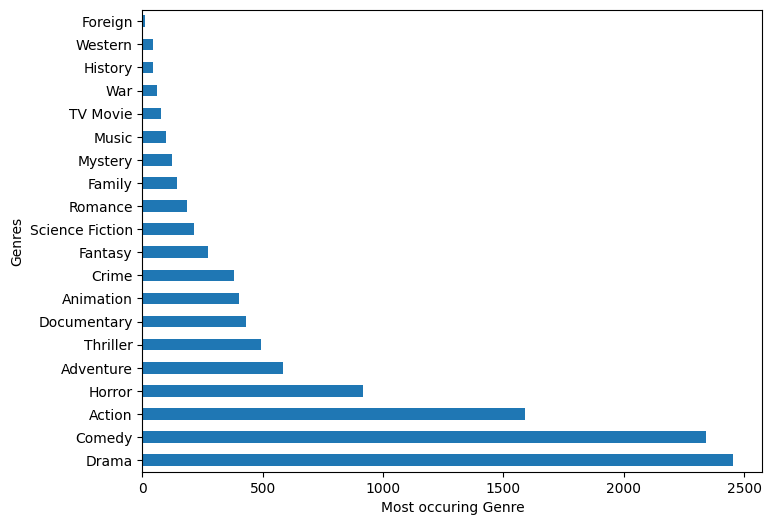

In [15]:
# Checking for the most occuring genres
fig = plt.figure(figsize =(8, 6))
movies['genres'].value_counts()[:30].plot(kind='barh') # used to pick the first 30 highest ranking/occuring genres.
plt.xlabel('Most occuring Genre')
plt.ylabel('Genres')

Q1: Which genres are most popular from year to year

Text(0, 0.5, 'Genres')

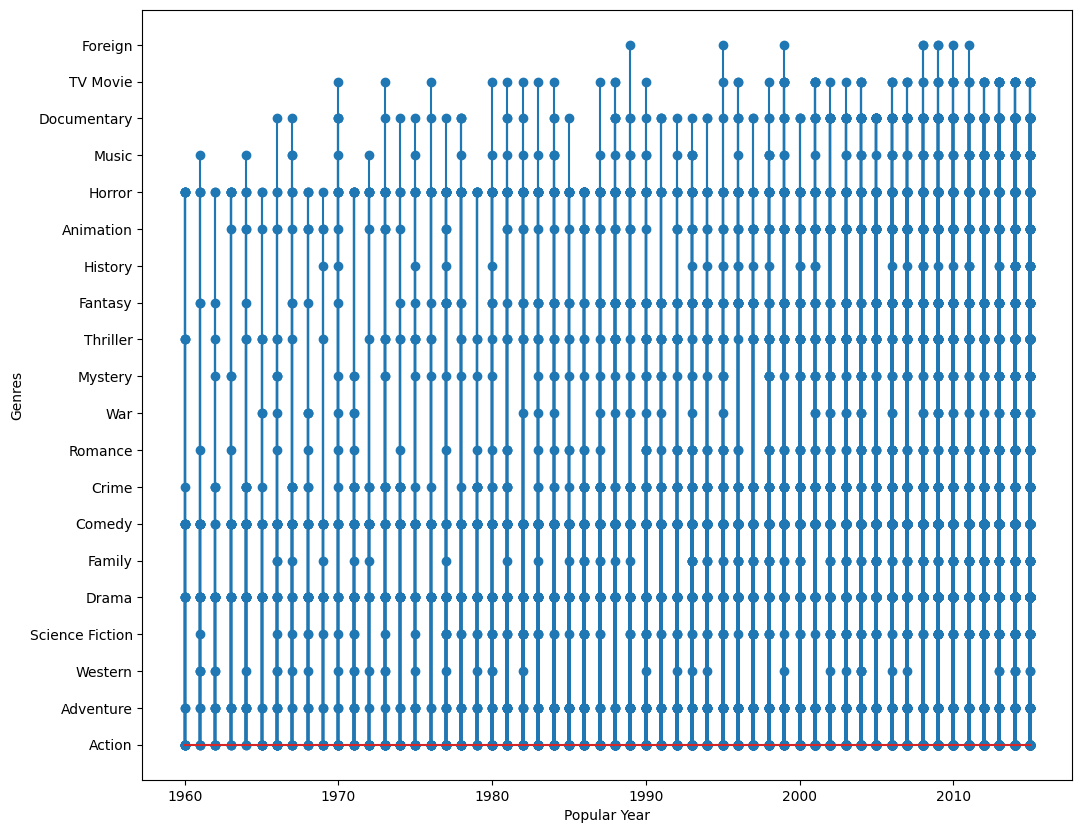

In [17]:
fig = plt.figure(figsize =(12, 10))
x = movies['release_year']
y = movies['genres']
plt.stem(x, y)
plt.xlabel('Popular Year')
plt.ylabel('Genres')

I used the Stem Plot to derive my insight on the popular genres from year to year. Each stem represents year. So each year a genre is popular, it is circled around the stem, and each year a genre isn't popular, that stem is left uncircled for that year. Genres that are popular in all the years includes; Action, Drama, Comedy and Horror. The next genre in line was Crime, but it wasn't popular in 1961, 1963, 1966, 1969, 1977, and 1982. The worst occuring genre is Foreign which is popular in only 7 years (1989, 1995, 1999, 2008, 2009, 2010, and 2011)

In [18]:
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


What kinds of properties are associated with movies that have high revenues

TypeError: 'value' must be an instance of str or bytes, not a float

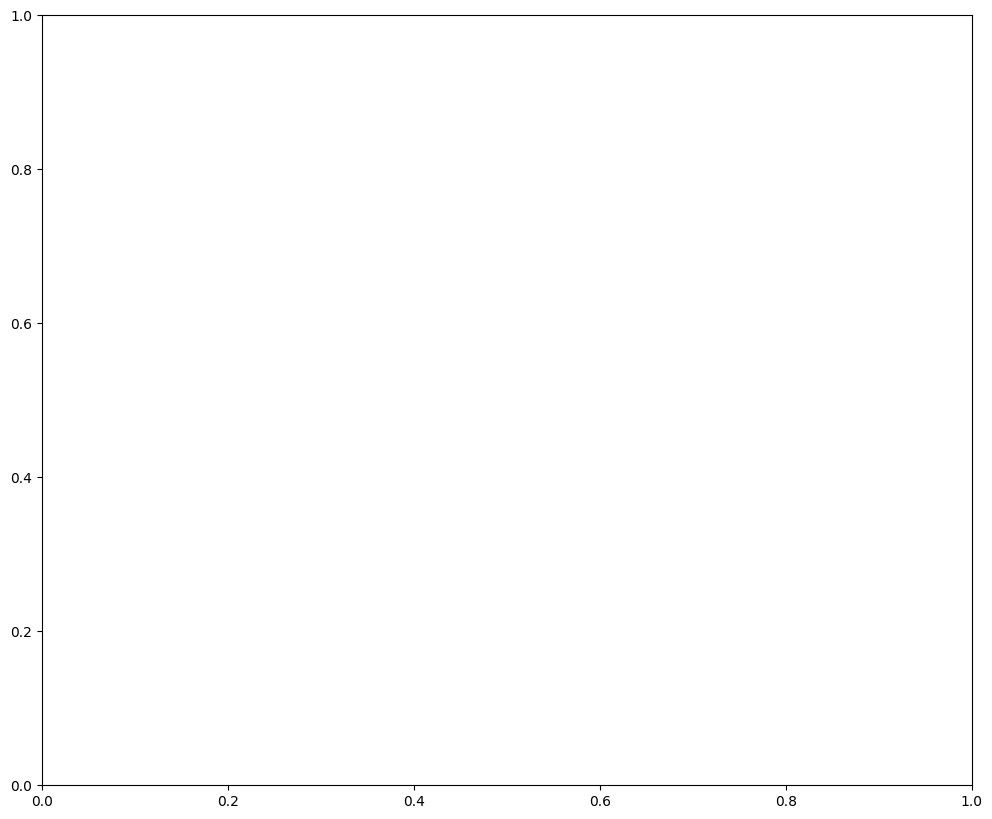

In [29]:
fig = plt.figure(figsize =(12, 10))
x = movies['revenue_adj']
y = movies['imdb_id']
plt.bar(x,y)
